# COGS 108 - FIFA Winners Wearing Orange

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ x ] YES - make available
* [  ] NO - keep private

# Overview

The project focuses on the question whether the colour of the jersey infleunces the success rate in the FIFA World Cup from the years 1900 to 2020. More specifically, we hypothesized that the colour red would be the successful colour as it is known to be a colour of passion and energy. Throughtout this project, we took account the factors that would affect how the FIFA games would be played such as the match being neutral or whether game was a qualifier or not. Taking the average scores in the matches between the jersey colours, we came up with revised hypothesis:t eams that have orange home jerseys tend to score have higher average scores in FIFA games as opposed to other teams.

# Names

- Moksha Poladi
- Esha Desai 
- Sonika Ram
- Satomi Ito

<a id='research_question'></a>
# Research Question

Does the color red of a team’s jersey influence the chance of success in the FIFA World Cup from the years 1900 to 2020?

<a id='background'></a>

## Background & Prior Work

This question was of interest for our group because we were curious about how specific colors impact our perception. It has been shown that red stimuli can often cause an increase in aggression and dominance in competitive settings. Furthermore, in the animal kingdom red coloration has been seen as a marker of high testosterone and superiority in physical dominance. 

Based on this information, we wanted to see if the red color on a team’s jersey would bring out aggression and dominance within the sport. We were able to find a study stating that in the Olympics, for aggressive sports such as boxing and wrestling, the scarlet color uniform has given a competitor an advantage in the match. The study stated that 55% of competitors that were wearing a red uniform won all competitions within the Olympics.

Furthermore, another study stated that wearing the color red was linked to having a higher heart rate, higher testosterone levels, and even greater performance strength. With the knowledge of these two studies, we were curious to explore the imapct of red stimuli in the FIFA world cup tournaments, from the years 1900 to 2020.

References (include links):
- 1) https://royalsocietypublishing.org/doi/10.1098/rsbl.2015.0166 
- 2) https://www.nature.com/news/2005/050516/full/news050516-4.html 

# Hypothesis


We hypothesize that there would be a correlation with the jersey colour and the team's win rate. This means that we preciated that there would be more wins with teams who wear red jerseys from year 1900 to 2020 because the colour red determins passion and energy.

To test our hypothesis we conducted various tests that compare average scores throughout various situations such as the qualifiers, the World Cup, amd whether the team played on neutral or not. 


## Revised Hypothesis

Due to the outcomes of the data we collected, we shifted our hypothesis to say: Teams that have orange home jerseys tend to score have higher average scores in FIFA games as opposed to other teams.

To explore this new hypothesis, we decided to create a new column, home_jersey_bool_orange, that has the value 1 if the jersey of the home team is orange and 0 otherwise.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: results.csv 
- Link to the dataset: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/version/23
- Number of observations: 386091 

results.csv contains the International football results from 1872 to 2021. Each row of the data represents a football match played between international soccer teams. It contains additional information such as the score, date and type of tournamnet.

- Dataset Name: jersey_color_final.csv 
- Link to the dataset: We created this dataset using information of team jerseys available at https://www.footshirt.com/
- Number of observations: 100 

jersey_color_final.csv contains the home and away jersey colors for the top 100 teams. Top 100 here is defined as the 100 most frequently occuring teams in our results.csv dataset

The two datasets are going to be joined on the home_team column from results.csv and the team column from jersey_color_final.csv

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
df = pd.read_csv('FIFA_data/results.csv')

In [3]:
# Identified the 100 most occuring teams in both home_team and away_team categories to populate our jerseys dataset.

In [4]:
teams = list(df['home_team']) + list(df['away_team'])
top_100 = pd.Series(teams).value_counts().sort_values(ascending = False).index[:100]

In [5]:
df_jerseys = pd.read_csv('FIFA_data/jersey_color_final.csv', header = None)
df_jerseys = df_jerseys.rename({0:'Team', 1:'home_jersey', 2:'away_jersey'}, axis = 1)

In [6]:
# We first filtered our dataset for only FIFA tournaments. We decided to include the qualifiers as well. 
df = df.loc[df['tournament'].str.contains('FIFA')]
# Joining our fifa dataset with the jersey dataset
final_df = pd.merge(df, df_jerseys, how = 'inner', left_on = 'home_team', right_on = 'Team')

In [7]:
final_df = final_df[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'neutral', 'home_jersey', 'away_jersey']]

In [8]:
final_df['home_jersey_bool'] = final_df['home_jersey'].apply(lambda x: 1 if x == 'Red' else 0)
final_df['away_jersey_bool'] = final_df['away_jersey'].apply(lambda x: 1 if x == 'Red' else 0)

In [9]:
final_df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_jersey,away_jersey,home_jersey_bool,away_jersey_bool
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,True,Red,Black,1,0
1,1930-07-20,Belgium,Paraguay,0,1,FIFA World Cup,True,Red,Black,1,0
2,1934-04-29,Belgium,Netherlands,2,4,FIFA World Cup qualification,False,Red,Black,1,0
3,1934-05-27,Belgium,Germany,2,5,FIFA World Cup,True,Red,Black,1,0
4,1938-04-03,Belgium,Netherlands,1,1,FIFA World Cup qualification,False,Red,Black,1,0


In [10]:
final_df['tournament'].value_counts()

FIFA World Cup qualification    5724
FIFA World Cup                   882
FIFA Arab Cup qualification        4
FIFA 75th Anniversary Cup          1
Name: tournament, dtype: int64

In [11]:
final_df = final_df.loc[(final_df['tournament'] == 'FIFA World Cup') | (final_df['tournament'] == 'FIFA World Cup qualification')]

In [12]:
final_df['date'] = pd.to_datetime(final_df['date'])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

# Question 1: Compare the average scores for qualifiers vs. actual FIFA world cup games.

In [13]:
# To find average score, we created a new column called game score which is the sum of home score and away_score.


In [14]:
final_df['game_score'] = final_df['home_score'] + final_df['away_score']

In [15]:
avg_comparison = final_df.groupby('tournament')['game_score'].mean()

In [16]:
avg_comparison

tournament
FIFA World Cup                  2.834467
FIFA World Cup qualification    2.903040
Name: game_score, dtype: float64

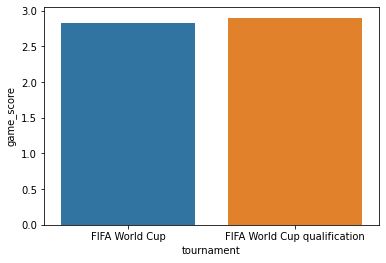

In [17]:
sns.barplot(avg_comparison.index, avg_comparison);

The average game score of the FIFA World Cup qualification is slightly higher than than the average game score of the FIFA World Cup. This could potentially be because the teams that the winning team played against were weaker at the qualifications than the teams they played against at the World Cup itself.

# Question 2: Compare average score for neutral vs. non-neutral games

In this dataset, a value of True for the neutral column implies that the game was in a neural venue i.e. the game was played in a stadium that was not the home ground for either team.

In [18]:
avg_comparison_neutral = final_df.groupby('neutral')['game_score'].mean()

In [19]:
avg_comparison_neutral

neutral
False    2.901989
True     2.854481
Name: game_score, dtype: float64

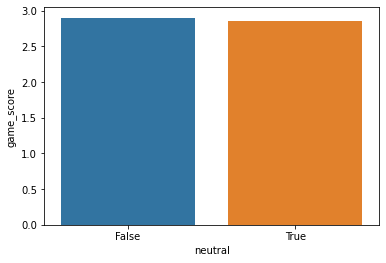

In [20]:
sns.barplot(avg_comparison_neutral.index, avg_comparison_neutral);

Our initial hypothesis was that games at non-neutral venues might have higher scores because on the teams might have a home ground advantage and playing in a faimiliar venue might have an impact on performance. The data does show that non-neutral venues have higher average scores but it is hard to say if this difference is statistically significant or due to random chance.

# Question 3: Explore the average score trend over time

In [21]:
# We decided to ecplore this trend on a yearly basis and so calculated the average score for each year.
final_df['year'] = final_df['date'].dt.year

In [22]:
year_analysis = final_df.groupby('year')['game_score'].mean()

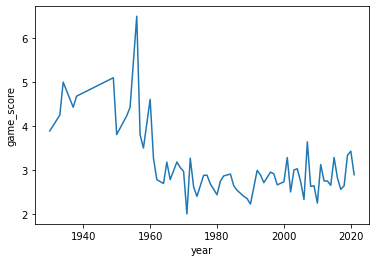

In [23]:
sns.lineplot(year_analysis.index, year_analysis);

From this lineplot, we can determine that the average game scores were higher up to the 1960s. We can infer that in the 1950s there could of been few teams that dominated the FIFA worldcup and thus had very high scores. However, as time pass there is a down trend. This downtrend could of been caused due to the teams improving. More resources and money have been put into FIFA and the sports which causes an increase in stronger teams.

In the future, it would also be interesting to explore the spike at 1956.

# Question 4: Which country has won the most number of wins?

In [24]:
# We created a new column called winner to display the winner of each game.
final_df['winner'] = np.where((final_df.home_score > final_df.away_score), final_df.home_team, final_df.away_team)

In [25]:
# We grouped by winner to find how many times each country one.
winner_counts = final_df['winner'].value_counts()

In [26]:
# Filtered the top 10.
winner_counts_10 = winner_counts.head(10)

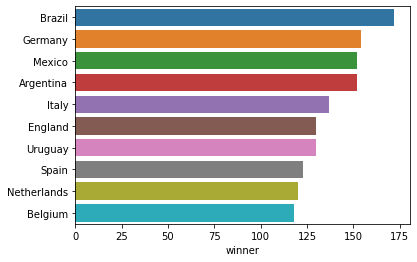

In [27]:
sns.barplot(y = winner_counts_10.index, x = winner_counts_10);

From this barplot, we can determine that Brazil has the most number of wins with Germany in the second.

Disclaimer: In FIFA, the same countries do not necessarily participate through the years so there might be some biases when we only take into account the counts..

# Question 5: Check if teams with a certain jersey color has higher average scores than other colors. In accordance with our initial hypothesis, we will focus on the color red.


In soccer, each team has both a home jersey and away jersey. If the away team's home jersey color is considered similar to that of the home team, they will be asked to wear their away jersey instead. As a result, it becomes difficult to know exactly what color the winner was wearing.

As a proxy, we decided to look at the average home_score for each team and then group by jersey color. Since the home team nearly always wears the home jersey, their home_score can be used as our metric for comparison.

In [28]:
team_means = final_df.groupby('home_team').agg({'home_score':np.mean, 'home_jersey':max})

In [29]:
team_means.sort_values(by = 'home_score', ascending = False).head(20)

,home_score,home_jersey
home_team,,
Australia,3.388889,Yellow
New Zealand,3.333333,White
Syria,2.695652,Red
Mexico,2.630252,Green
China PR,2.555556,Red
Spain,2.544444,Red
Germany,2.539062,White
Netherlands,2.531250,Orange
Japan,2.407895,Blue


This new metric is not a perfect substitute for the number of games won as the teams with the highest average home_scores are not necessarily those with the highest wins. But a lot of the teams in the top ten as seen in earlier analysis appear in the top 20 of this analysis so we believe it is an acceptable substitute.

Additionally, we decided to group by team and find average home score and then compute the average of the average by home jersey color. An alternative approach was to simply group by the home jersey color to obtain a game level average but both methods produced similar results so we decided to first compute team level averages.



In [30]:
jersey_avg = team_means.groupby('home_jersey')['home_score'].mean()
jersey_avg

home_jersey
Black           1.923077
Blue            1.686253
Blue + White    1.962687
Green           1.945136
Orange          2.443403
Red             1.825375
White           1.984397
Yellow          1.857157
Name: home_score, dtype: float64

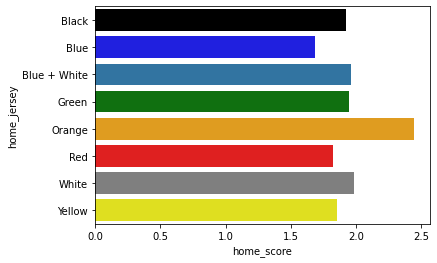

In [31]:
sns.barplot(y=jersey_avg.index, x= jersey_avg, palette = ['black', 'blue', 'C0', 'green', 'orange', 'red', 'C17', 'yellow']);


These averages seem to contradict our initial hypothesis. It is evident that teams with red jerseys don't really seem to be scoring any higher than those of other colors. However after seeing the scores, we noticed that teams with orange jerseys in general scored higher. We then found out that the color orange signifies spontaniety, energy, and passion. This could potentialy be because while red symbolizes aggression, perhaps orange which signifies energy and passion have more of an effect in a game like soccer.

## Revised Hypothesis

In [32]:
final_df['home_jersey_bool_orange'] = final_df['home_jersey'].apply(lambda x: 1 if x== 'Orange' else 0)
final_df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_jersey,away_jersey,home_jersey_bool,away_jersey_bool,game_score,year,winner,home_jersey_bool_orange
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,True,Red,Black,1,0,3,1930,United States,0
1,1930-07-20,Belgium,Paraguay,0,1,FIFA World Cup,True,Red,Black,1,0,1,1930,Paraguay,0
2,1934-04-29,Belgium,Netherlands,2,4,FIFA World Cup qualification,False,Red,Black,1,0,6,1934,Netherlands,0
3,1934-05-27,Belgium,Germany,2,5,FIFA World Cup,True,Red,Black,1,0,7,1934,Germany,0
4,1938-04-03,Belgium,Netherlands,1,1,FIFA World Cup qualification,False,Red,Black,1,0,2,1938,Netherlands,0


In [33]:
df_2 = final_df.groupby('home_team')[['home_score', 'home_jersey_bool_orange']].mean()
df_2.groupby('home_jersey_bool_orange')['home_score'].mean()

home_jersey_bool_orange
0.0    1.838375
1.0    2.443403
Name: home_score, dtype: float64

These results indicate that teams with orange jerseys tend to score more on average than teams with other jersey colors. However, we do not know if this difference in means is statistically significant and we would have to perform a permutation test to check for statistical significance.

## Permutation Test

Null Hypothesis: There is no difference on wins with teams who wear orange jerseys and those who don’t.

Alternative Hypothesis: The teams who wear orange jerseys have higher average scores than those who don’t.

To test our hypothesis, we chose a significance level of 5%. 

In [41]:
perm_df = df_2.reset_index()[['home_score', 'home_jersey_bool_orange']]

In [42]:
perm_df.groupby('home_jersey_bool_orange').mean()

,home_score
home_jersey_bool_orange,
0.0,1.838375
1.0,2.443403


It seems like teams with an orange jersey have a higher average score than teams that do not wear an orange jersey. Now we are going to test if this difference is statistically significant.

In [50]:
test_stat = perm_df.groupby('home_jersey_bool_orange').mean().diff().abs().iloc[1]['home_score']

In [59]:
obs = []
for i in range(10000):
    perm_df_2 = perm_df.assign(shuffled = perm_df['home_score'].sample(replace = False, frac = 1).reset_index(drop = True))
    observed = perm_df_2.groupby('home_jersey_bool_orange')['shuffled'].mean().diff().abs().iloc[1]
    obs.append(observed)



In [61]:
(test_stat >= obs).mean()

0.8828

# Ethics & Privacy

When formulating our question, we considered the ethical implications and whether our research will be harmful to others. Since our question simply deals with the outcome of games and the color of the jerseys, all the information is publicly available. Our information will be used in an unbiased manner and not used for nefarious purposes. 

In terms of biases, our data will not reflect personal preferences of teams and will not affect the outcome in any way.

In terms of informed consent, we are not taking any information regarding the players without their consent. We are not dealing with any individual player data and thus will not be obtaining any personal data. Our question is going to be answered based on the data we collect and it is going to be done in an unbiased, safe manner. 

# Conclusion & Discussion

In conclusion, our original hypothesis was altered due to the data from the EDA. However, even with our revised hypothesis, we found that the hypothesis is false because the difference is not statistically significant. Since we got a p value of 0.8828, which is greater than 0.05, we failed to reject the null hypothesis. Based on our p value, the teams with orange jerseys do not necessarily perform better than teams with other colour jerseys; the observed difference in scores is due to randomness. 

The limitation we faced was while creating our dataset as we were unable to find a dataset that had the jersey colors of every team. We then realized that there are different colors for home and away jerseys, as opposed to some sports such as wrestling that only have one color. This made it difficult to see which jersey each team was wearing. To account for this, we only looked at home scores as we knew the home team always wore their home jersey. Overall, soccer is a sport that comes with a lot of confounding variables such as home field advantages so it was hard to find non biased results.

# Team Contributions

We all collaborated and attended every group meeting to discuss this project. Esha and Moksha worked on the coding part while Satomi and Sonika worked on the analysis and the writing aspect; therefore, there was a fair amount being distributed to each person.